In [32]:
import pandas as pd 
from datetime import datetime,timedelta
import numpy as np

In [2]:
data_user = pd.read_csv('../../../tianchi_fresh_comp_train_user.csv')

In [3]:
data_item = pd.read_csv('../../../tianchi_fresh_comp_train_item.csv')

In [4]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23291027 entries, 0 to 23291026
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   user_geohash   object
 4   item_category  int64 
 5   time           object
dtypes: int64(4), object(2)
memory usage: 1.0+ GB


In [5]:
data_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620918 entries, 0 to 620917
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   item_id        620918 non-null  int64 
 1   item_geohash   203410 non-null  object
 2   item_category  620918 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 14.2+ MB


In [7]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12
2,10001082,4368907,1,NaN,5503,2014-12-12 12
3,10001082,53616768,1,NaN,9762,2014-12-02 15
4,10001082,151466952,1,NaN,5232,2014-12-12 11


In [15]:
# 统计所有的数据
day_data = {}
for i,row in data_user.iterrows():
    day,hour = row['time'].split(' ')
    day_data.setdefault(day,{})
    day_data[day].setdefault(hour,[0,0,0,0])
    index = row['behavior_type'] - 1
    day_data[day][hour][index] += 1

In [18]:
day_data

{'2014-12-08': {'18': [31321, 800, 999, 260],
  '07': [13453, 285, 370, 98],
  '00': [26801, 637, 697, 141],
  '19': [43737, 872, 1248, 392],
  '13': [38236, 725, 1260, 521],
  '17': [28919, 719, 832, 271],
  '01': [14813, 409, 480, 76],
  '14': [35979, 816, 1137, 360],
  '20': [54301, 1221, 1612, 467],
  '12': [33014, 732, 944, 381],
  '21': [65751, 1324, 1975, 490],
  '16': [33074, 668, 1034, 416],
  '22': [66423, 1411, 2211, 478],
  '08': [21316, 510, 578, 164],
  '15': [34257, 656, 1277, 437],
  '23': [47716, 1095, 1584, 348],
  '10': [33473, 887, 1090, 402],
  '09': [27010, 527, 802, 288],
  '11': [29594, 702, 1006, 398],
  '06': [8805, 206, 203, 39],
  '05': [4180, 127, 138, 39],
  '03': [5177, 153, 144, 23],
  '02': [7987, 198, 258, 34],
  '04': [3493, 134, 72, 20]},
 '2014-12-12': {'12': [54835, 983, 2008, 1289],
  '11': [54636, 864, 2098, 1603],
  '10': [60806, 917, 2441, 1666],
  '16': [53353, 933, 1815, 1098],
  '15': [54780, 924, 2023, 1228],
  '23': [82727, 1298, 3894, 212

In [129]:
# 我现在要把X轴弄出来 2014-11-18 - 2014-12-18  
label = [(datetime.strptime('2014-11-18', '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(31)]

In [40]:
#将统计的dict转换为 数组方便使用numpy
data_day_hour=[]
for day in label:
    hour_list = [ [] for i in range(24)]
    for hour,value in day_data[day].items():
        index = int(hour) 
        hour_list[index].append(value)
    data_day_hour.append(hour_list)

In [41]:
data_day_hour = np.array(data_day_hour)      

In [42]:
data_day_hour.shape

(31, 24, 1, 4)

In [43]:
print(data_day_hour)

[[[[24017   587   544   140]]

  [[11712   262   406    99]]

  [[ 6577   143   202    42]]

  ...

  [[60986  1418  1949   596]]

  [[58563  1181  1849   529]]

  [[41945   945  1357   307]]]


 [[[24606   563   592   169]]

  [[12057   322   282    64]]

  [[ 6195    83   117    20]]

  ...

  [[59943   988  1801   535]]

  [[57408  1080  1612   420]]

  [[39950   950  1345   249]]]


 [[[22492   382   726   168]]

  [[12677   306   358    56]]

  [[ 6304   267   183    47]]

  ...

  [[59220  1136  1632   448]]

  [[58321  1099  1563   446]]

  [[40999   930  1309   263]]]


 ...


 [[[25726   510   643   241]]

  [[14416   343   326    84]]

  [[ 8320   187   163    40]]

  ...

  [[68553  1324  1821   587]]

  [[62563  1310  1854   531]]

  [[45633  1141  1379   363]]]


 [[[26086   636   688   178]]

  [[12648   353   302    63]]

  [[ 6713   150   186    34]]

  ...

  [[66157  1197  1904   568]]

  [[61622  1415  1755   475]]

  [[44238  1084  1259   347]]]


 [[[24490   531   

In [127]:
#每天的汇总情况
day_total = np.sum(data_day_hour,axis=1)
#31 天 每个小时的汇总情况
hour_total = np.sum(data_day_hour,axis=0)

In [51]:
import matplotlib
import matplotlib.pyplot as plt

In [125]:
def show(title,data,label):
    plt.figure(figsize=[30,10])
    rects1 = plt.bar(label,data)
    plt.xticks(label,label,size='xx-large',rotation=50)
    plt.title(title,fontsize=20)
    plt.show()

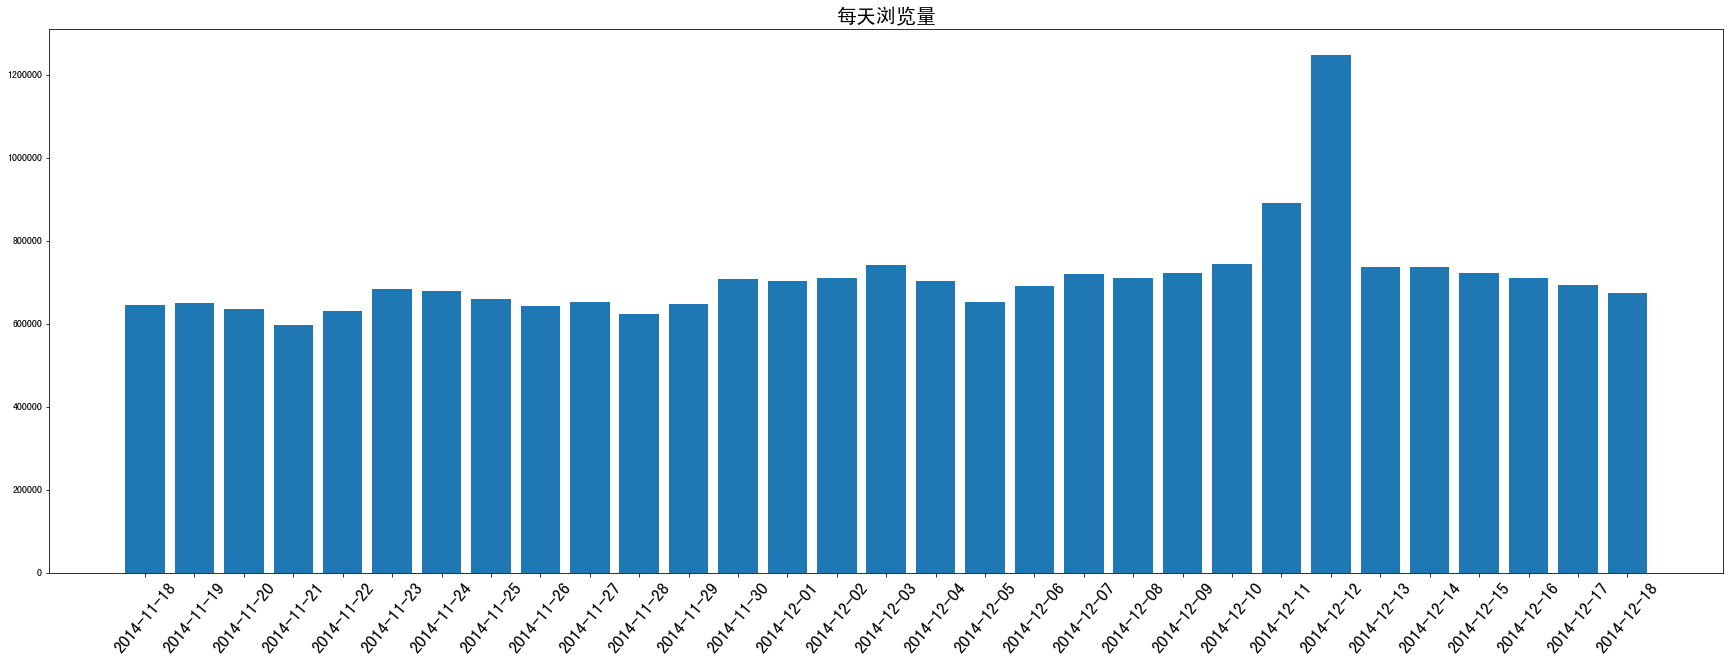

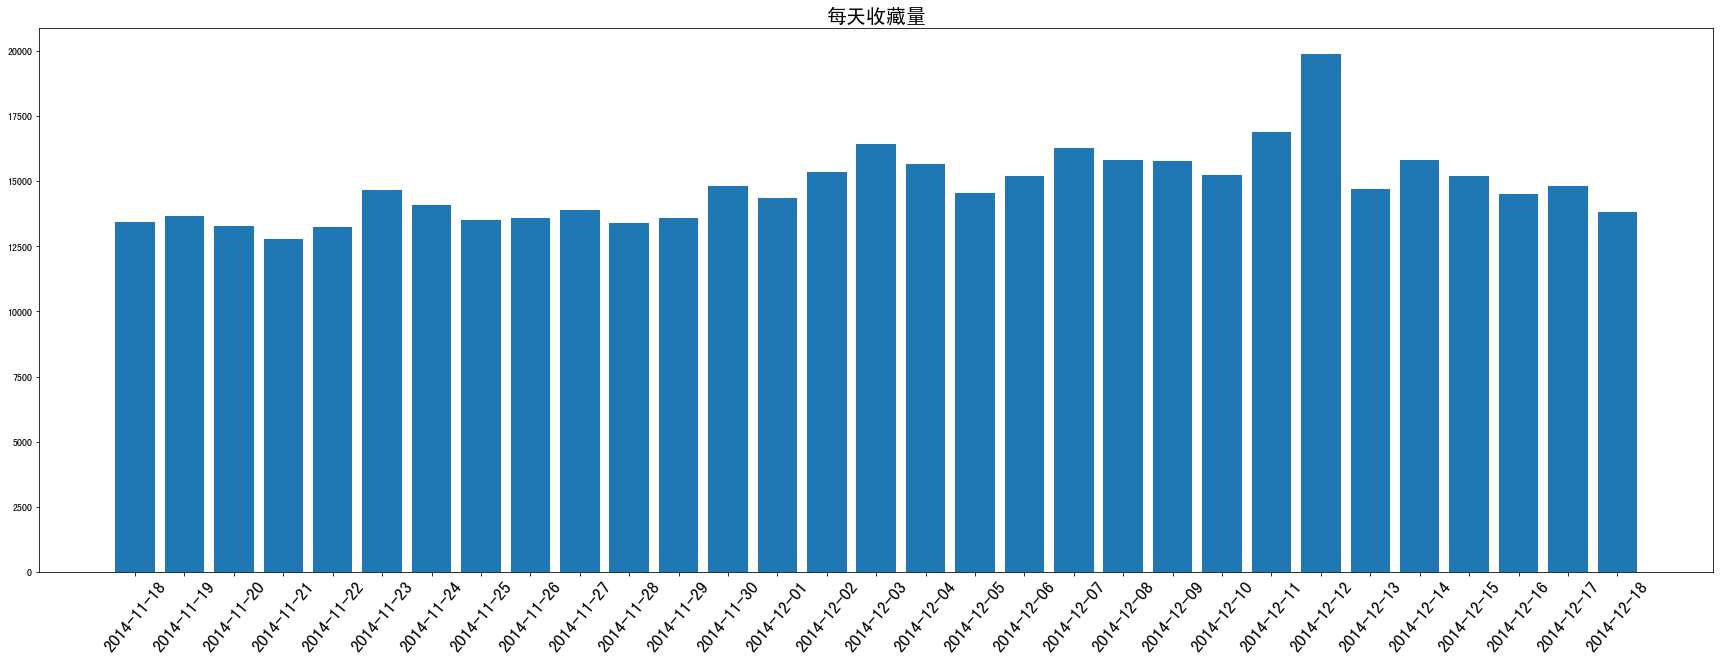

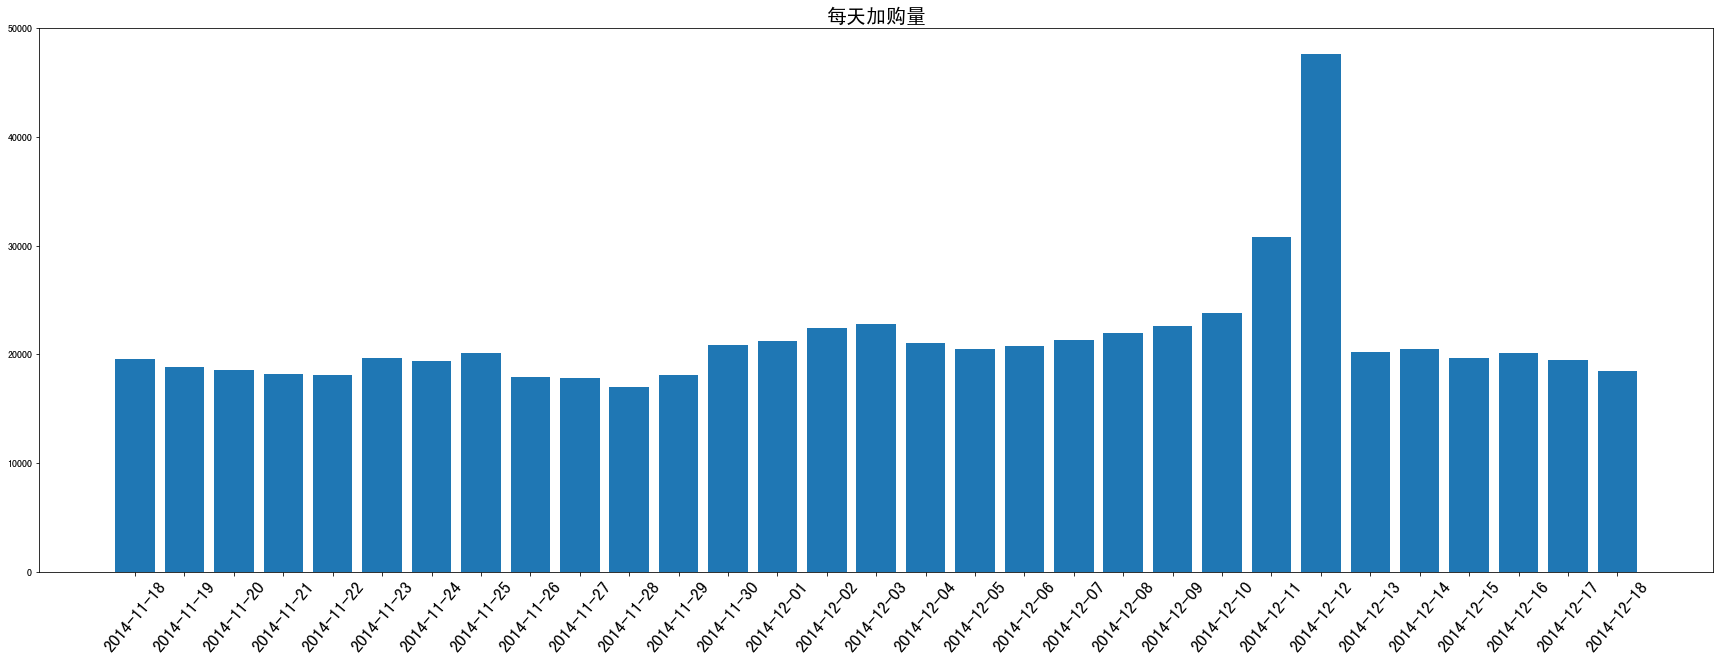

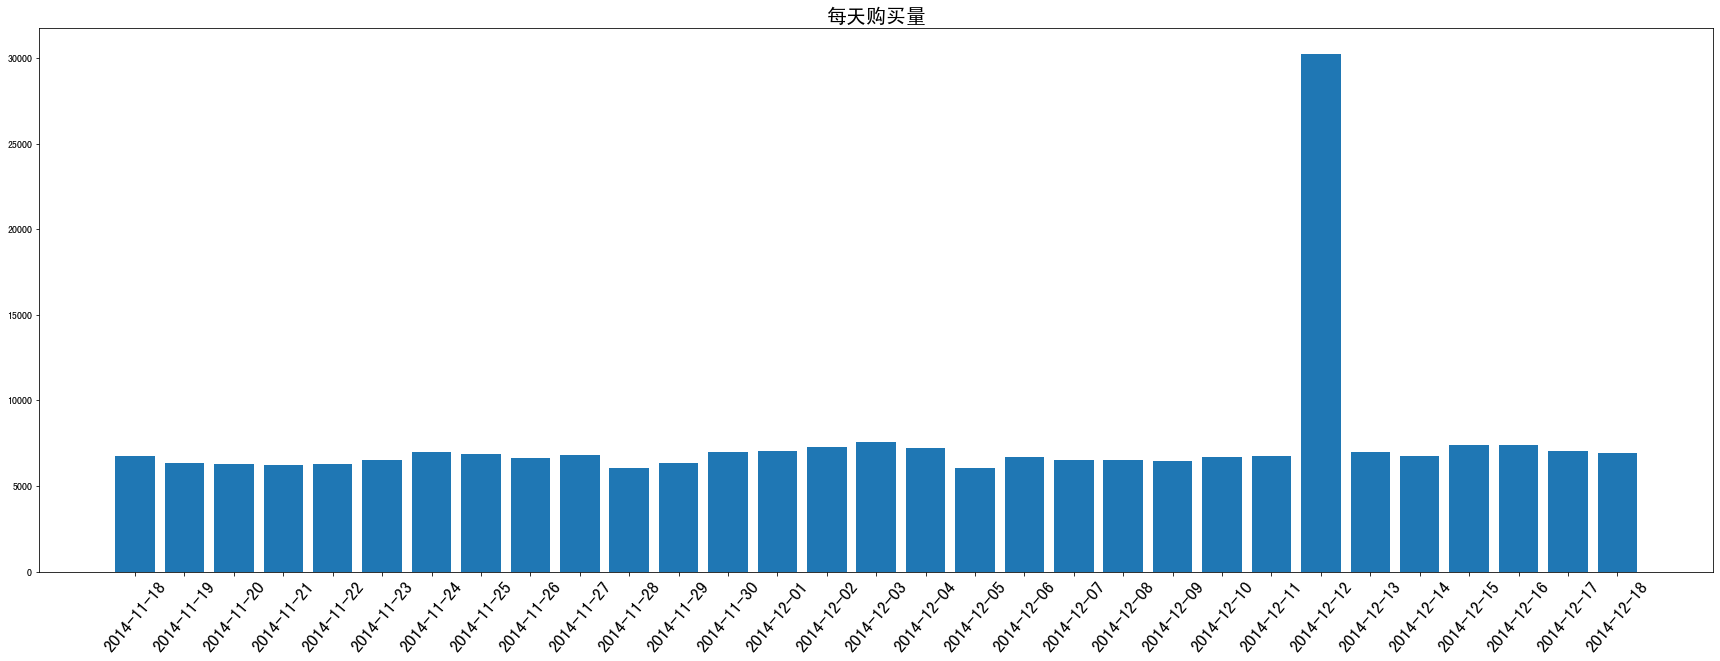

In [126]:
show('每天浏览量',day_total[:,:,0].reshape(1,-1)[0],label)
show('每天收藏量',day_total[:,:,1].reshape(1,-1)[0],label)
show('每天加购量',day_total[:,:,2].reshape(1,-1)[0],label)
show('每天购买量',day_total[:,:,3].reshape(1,-1)[0],label)

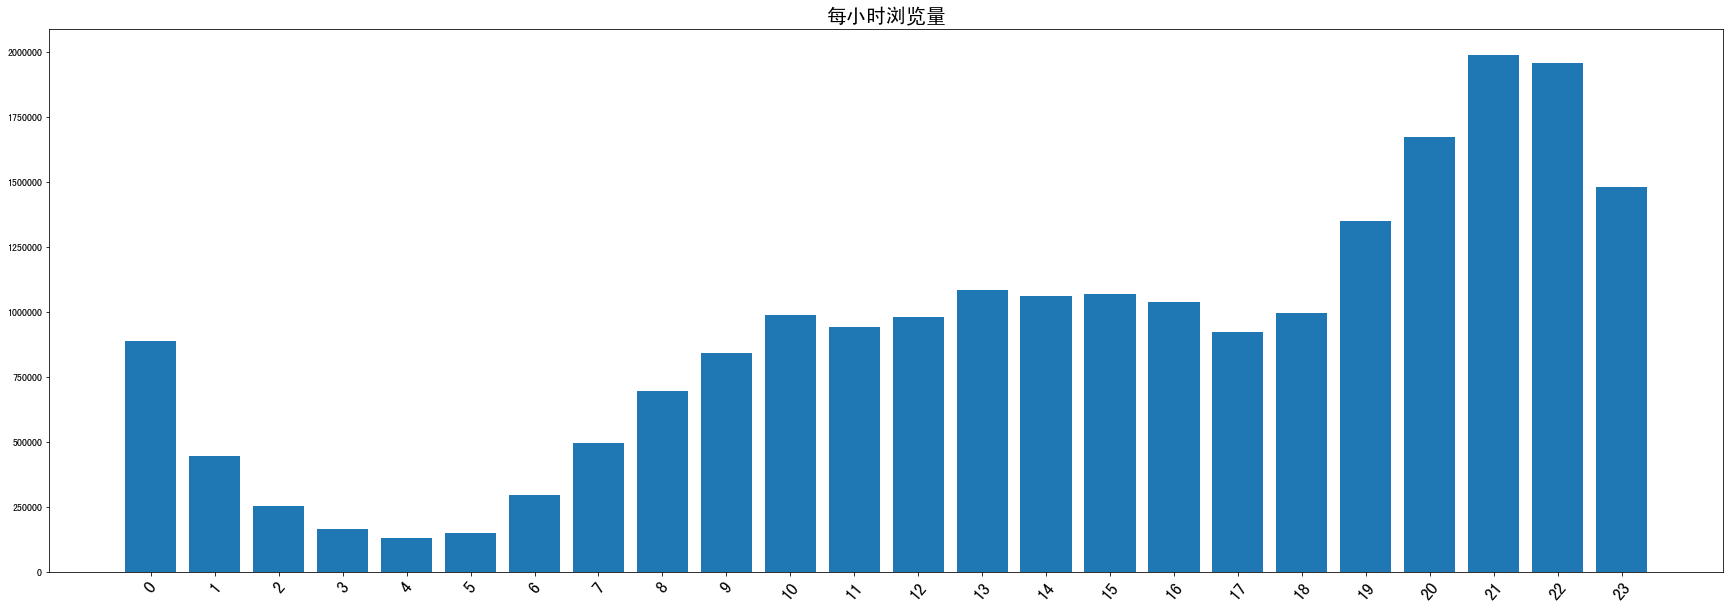

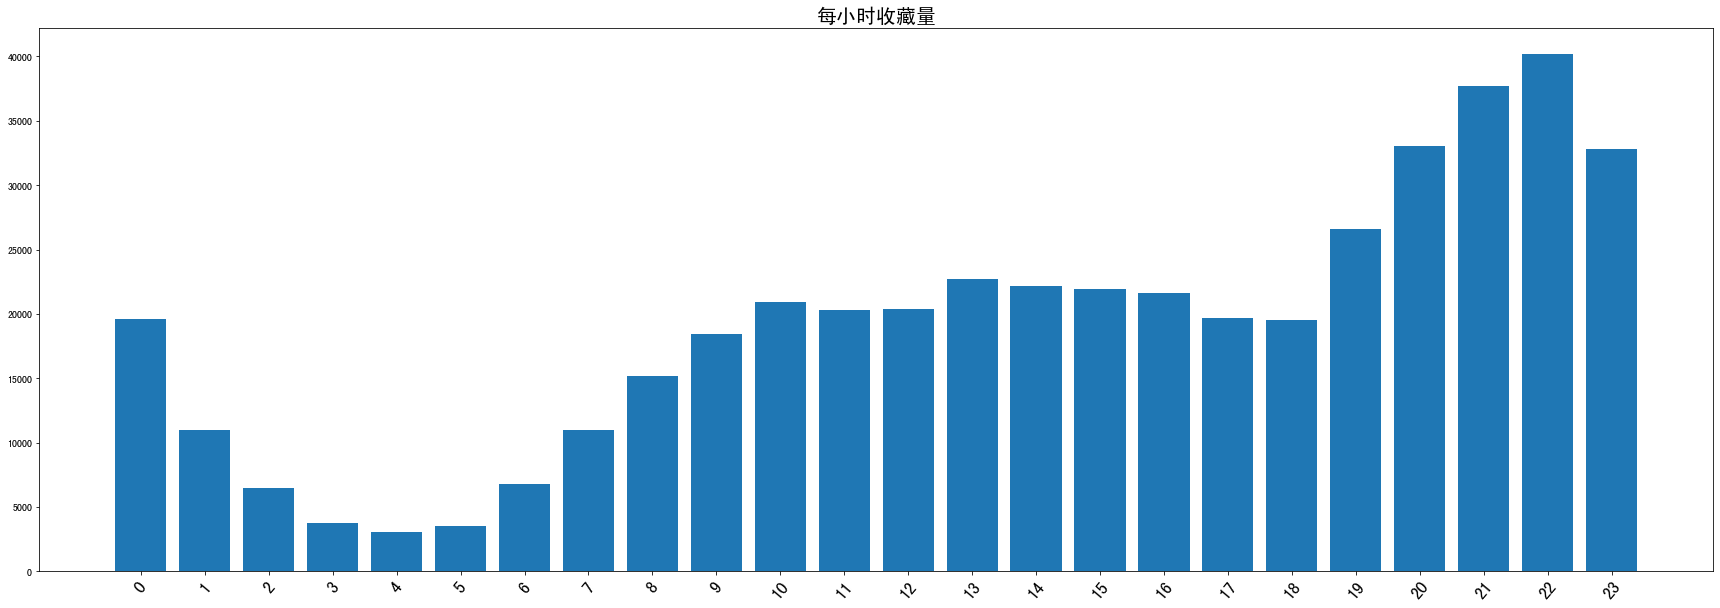

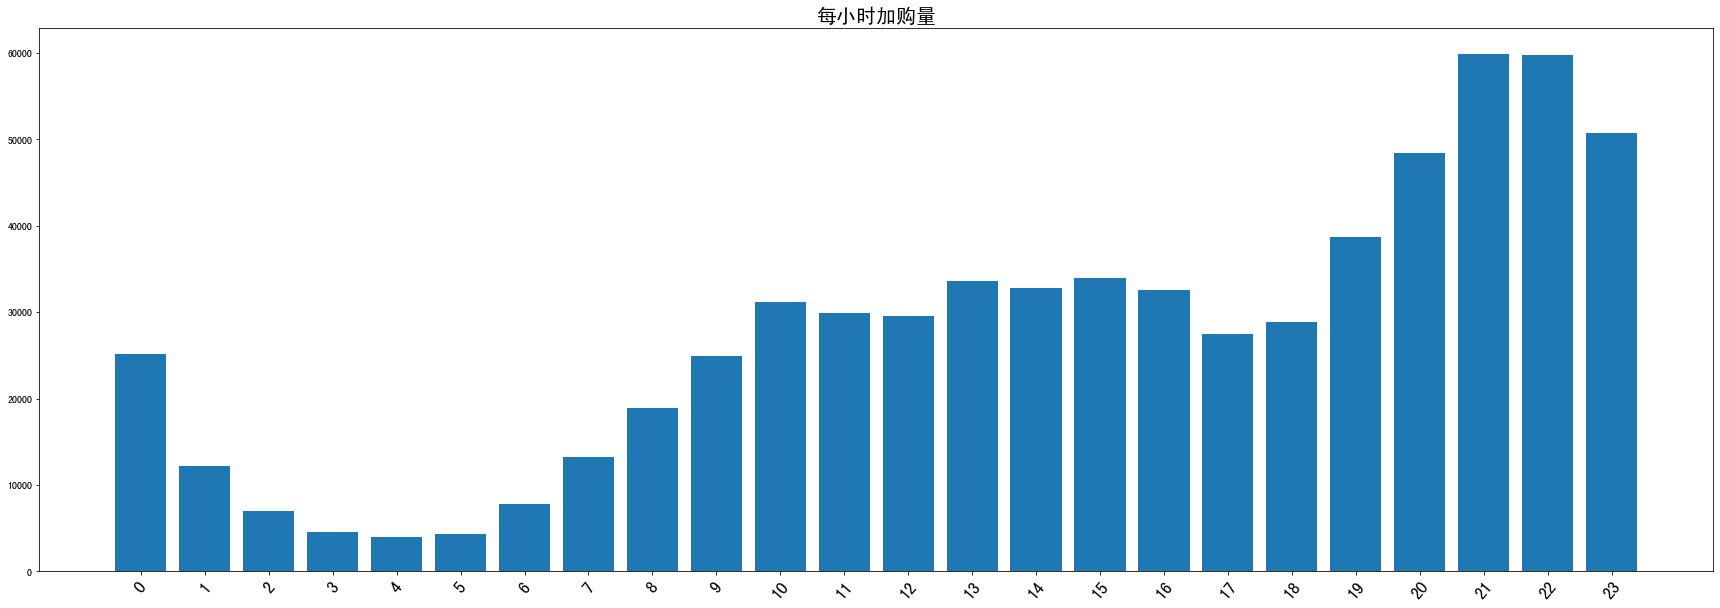

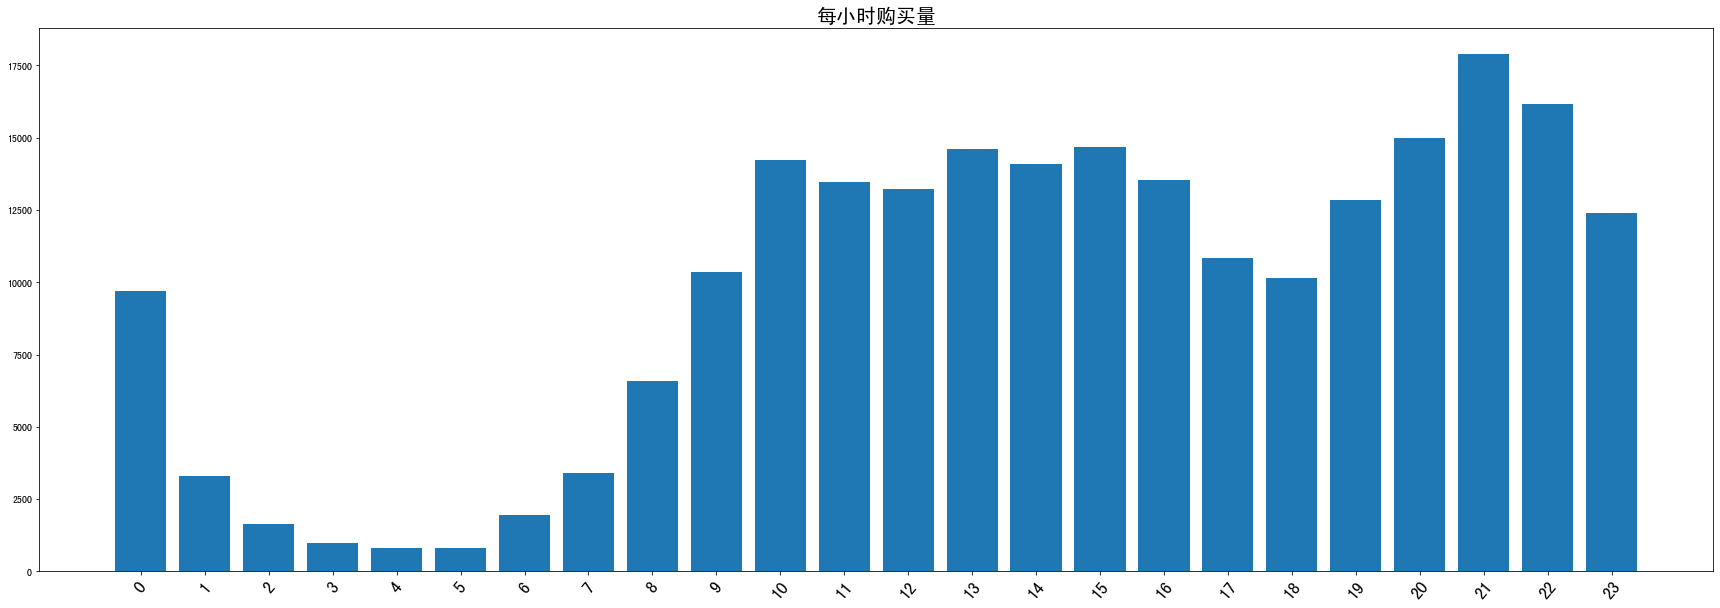

In [128]:
show('每小时浏览量',hour_total[:,:,0].reshape(1,-1)[0],list(range(24)))
show('每小时收藏量',hour_total[:,:,1].reshape(1,-1)[0],list(range(24)))
show('每小时加购量',hour_total[:,:,2].reshape(1,-1)[0],list(range(24)))
show('每小时购买量',hour_total[:,:,3].reshape(1,-1)[0],list(range(24)))